### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

###  Data Preparation

### Load Dataset

In [4]:
df = pd.read_csv('../data/insurance_data.csv')  # Replace with your dataset path

### Understand the Data Structure

In [5]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())

   Unnamed: 0 Province  Zipcode  Gender  Total_Claim      Premium
0           0        C     1003  Female   652.740226   898.493109
1           1        A     1003  Female  1159.389368  1040.563548
2           2        C     1003    Male   729.641413  1137.593249
3           3        C     1003  Female   253.524198   764.332164
4           4        A     1001    Male   938.056933  1349.828367
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Province     1000 non-null   object 
 2   Zipcode      1000 non-null   int64  
 3   Gender       1000 non-null   object 
 4   Total_Claim  1000 non-null   float64
 5   Premium      1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None


### Summary Statistics

In [6]:
# Summary statistics
print(df.describe())

        Unnamed: 0      Zipcode  Total_Claim      Premium
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    499.500000  1001.999000   931.049722  1112.742919
std     288.819436     0.817109   566.679835   198.269534
min       0.000000  1001.000000    27.339840   527.702050
25%     249.750000  1001.000000   513.545195   984.410128
50%     499.500000  1002.000000   816.332296  1115.189886
75%     749.250000  1003.000000  1225.736472  1252.291547
max     999.000000  1003.000000  4691.694334  1684.477791


### Check for Missing Values

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### Visualize Distributions

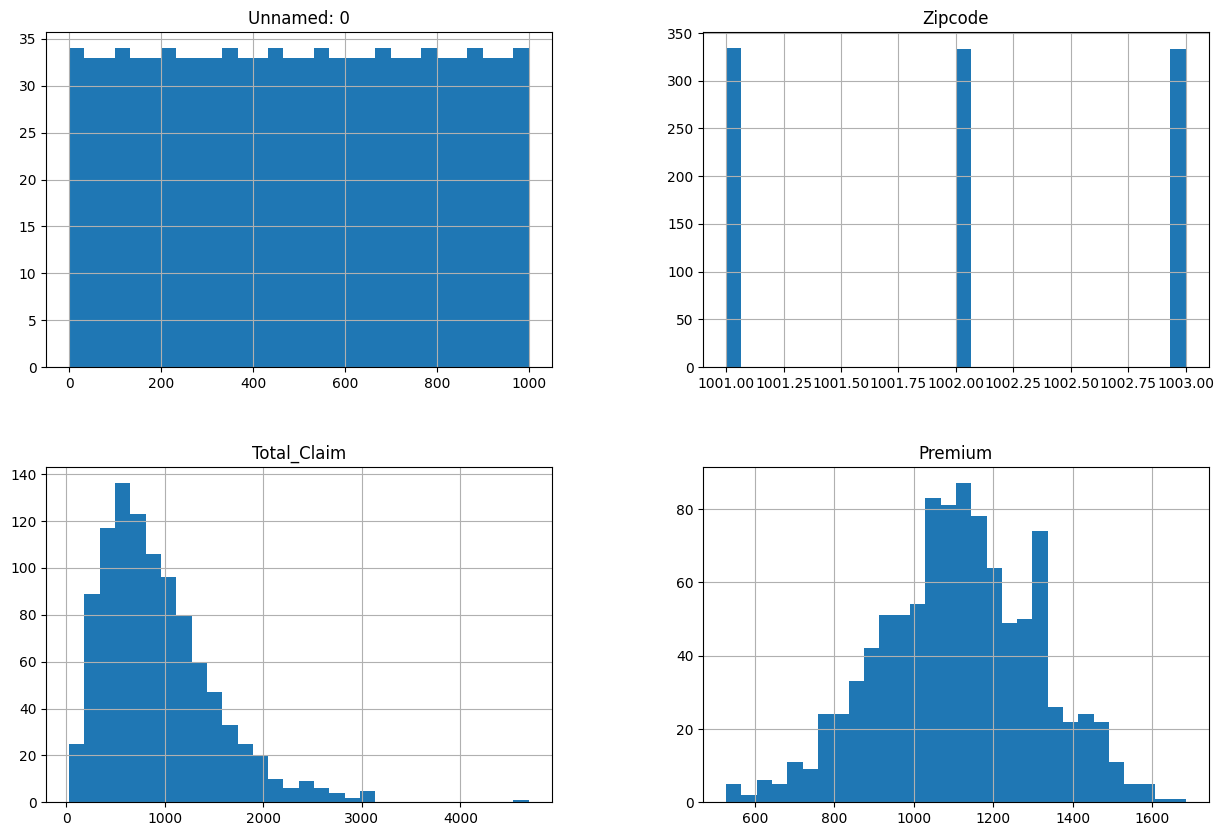

In [8]:
# Histogram of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()

### Feature Engineering

In [18]:
df['Claim_to_Premium_Ratio'] = df['Total_Claim'] / df['Premium']

### Encoding Categorical Data

In [19]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Province', 'Gender'], drop_first=True)

### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Total_Claim', 'Premium'])  # Features
y = df['Total_Claim']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Modeling Techniques

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Decision Trees

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

### Gradient Boosting Machines (GBMs) - XGBoost

In [ ]:
import xgboost as xgb

print(xgb.__version__)
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Prepare Features and Target Variable

In [17]:
y_pred_rf = rf_model.predict(X_test)

### Make Predictions

In [23]:
y_pred_rf = rf_model.predict(X_test)

### Feature Importance Analysis

In [35]:
# For Random Forest
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importances)

             Importance
Zipcode        0.324184
Gender_Male    0.289474
Province_C     0.238381
Province_B     0.147961


## Evaluate the Model

### Implementing the Random Forest model, making predictions, and evaluating its performance

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R² Score:", rf_r2)

Random Forest RMSE: 556.5838047492051
Random Forest R² Score: 0.024171422754224903


/opt/miniconda3/envs/pt1/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Implementing the Decision Tree model, making predictions, and evaluating its performance

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", dt_rmse)
print("Decision Tree R² Score:", dt_r2)

Decision Tree RMSE: 556.9945014688988
Decision Tree R² Score: 0.022730786307924244


/opt/miniconda3/envs/pt1/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Implement the Linear Regression model and evaluate its performance

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R² Score:", lr_r2)

Linear Regression RMSE: 557.0546828931322
Linear Regression R² Score: 0.0225195934495227


/opt/miniconda3/envs/pt1/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Summary DataFrame

In [33]:
import pandas as pd

# Create a summary DataFrame without XGBoost
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Linear Regression'],
    'RMSE': [rf_rmse, dt_rmse, lr_rmse],
    'R² Score': [rf_r2, dt_r2, lr_r2]
})

# Display the comparison
print(model_comparison)

               Model        RMSE  R² Score
0      Random Forest  556.583805  0.024171
1      Decision Tree  556.994501  0.022731
2  Linear Regression  557.054683  0.022520
